Práctica Big Data Procesing
Tenemos el dataset que contiene el reporte de países y su índice de felicidad en el transcurso de los años (world-happiness-report-2021.csv y world-happiness-report.csv) se les pide a los alumnos desarrollar responder las siguiente preguntas, utilizando las herramientas vistas a lo largo del módulo.
1. ¿Cuál es el país más “feliz” del 2021 según la data? (considerar que la columna “Ladder score” mayor número más feliz es el país)
2. ¿Cuál es el país más “feliz” del 2021 por continente según la data?
3. ¿Cuál es el país que más veces ocupó el primer lugar en todos los años?
4. ¿Qué puesto de Felicidad tiene el país con mayor GDP del 2020?
5. ¿En que porcentaje a variado a nivel mundial el GDP promedio del 2020 respecto al 2021? ¿Aumentó o disminuyó?
6. ¿Cuál es el país con mayor expectativa de vide (“Healthy life expectancy at birth”)? Y ¿Cuánto tenia en ese indicador en el 2019?


Ejercicio 1

¿Cuál es el país más feliz del 2021 según los datos?
Para resolver el ejercicio hemos importado pandas para poder leer el fichero. Tras esto hemos cargado el fichero y lo hemos denominado "Data_2021". Una vez cargado hemos realizado el Ejercicio_1 que es un DataFrame que contiene solo dos columnas "Country name" y "Ladder Score" ,ordenadas en descendente por "Ladder Score". Por ultimo he selccionado la primera variable de la tabla que es la que tiene mayor indice de felicidad.

*La respuesta es Finland con un índice de felicidad de 7.842 puntos.*

In [92]:
import pandas as pd

Data_2021 = pd.read_csv('world-happiness-report-2021.csv')

Ejercicio_1 = Data_2021[['Country name','Ladder score']].sort_values('Ladder score', ascending=False)
Pais_mas_feliz_2021 = Ejercicio_1.iloc[0]

display(Pais_mas_feliz_2021)

Country name    Finland
Ladder score      7.842
Name: 0, dtype: object

Ejercicio 2

¿Cuál es el país más “feliz” del 2021 por continente según la data?
Para resolver el ejercicio lo he realizado en tres pasos: (1) He agrupado en el DataFrame por continente y que encuentre el mayor indice de ladder score en cada grupo. (2) He seleccionado solo las columnas que me interesan Country name, regional indicar y ladder score y (3) por ultimo he ordenado por "ladder score".

La tabla con los paises por continentes mas felices es la siguiente

	Country name	Regional indicator	Ladder score
0	Finland	Western Europe	7.842
8	New Zealand	North America and ANZ	7.277
11	Israel	Middle East and North Africa	7.157
15	Costa Rica	Latin America and Caribbean	7.069
17	Czech Republic	Central and Eastern Europe	6.965
23	Taiwan Province of China	East Asia	6.584
31	Singapore	Southeast Asia	6.377
41	Uzbekistan	Commonwealth of Independent States	6.179
49	Mauritius	Sub-Saharan Africa	6.049
86	Nepal	South Asia	5.269

In [93]:

ejercicio_2 = Data_2021.loc[Data_2021.groupby('Regional indicator')['Ladder score'].idxmax()]
ejercicio_2 = ejercicio_2[['Country name', 'Regional indicator', 'Ladder score']]
ejercicio_2 = ejercicio_2.sort_values('Ladder score', ascending=False)


display(ejercicio_2)

markdown_table = ejercicio_2.to_markdown()
print(markdown_table)


,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.842
8,New Zealand,North America and ANZ,7.277
11,Israel,Middle East and North Africa,7.157
15,Costa Rica,Latin America and Caribbean,7.069
17,Czech Republic,Central and Eastern Europe,6.965
23,Taiwan Province of China,East Asia,6.584
31,Singapore,Southeast Asia,6.377
41,Uzbekistan,Commonwealth of Independent States,6.179
49,Mauritius,Sub-Saharan Africa,6.049
86,Nepal,South Asia,5.269


|    | Country name             | Regional indicator                 |   Ladder score |
|---:|:-------------------------|:-----------------------------------|---------------:|
|  0 | Finland                  | Western Europe                     |          7.842 |
|  8 | New Zealand              | North America and ANZ              |          7.277 |
| 11 | Israel                   | Middle East and North Africa       |          7.157 |
| 15 | Costa Rica               | Latin America and Caribbean        |          7.069 |
| 17 | Czech Republic           | Central and Eastern Europe         |          6.965 |
| 23 | Taiwan Province of China | East Asia                          |          6.584 |
| 31 | Singapore                | Southeast Asia                     |          6.377 |
| 41 | Uzbekistan               | Commonwealth of Independent States |          6.179 |
| 49 | Mauritius                | Sub-Saharan Africa                 |          6.049 |
| 86 | Nepal                    

 EJERCICIO 3 - ¿Cuál es el país que más veces ocupó el primer lugar en todos los años?

Como el resto de la practica, tenemos que contestar diferentes preguntas donde las unicas variables a evaluar son "Ladder score" , "GDP" y "Healthy expectancy at bird", y tenemos dos ficheros , uno referente a 2021 donde tenemos las columnas y otro con mayor historico de años que no tenemos la columnas "Ladder score" debemos crear una tercera tabla con los datos necesarios. Para ello:

Lo primero que hago es cargar los datos de felicidad mundial de 2021 y anteriores a 2021. Estos datos incluyen información sobre el 'Ladder score', que es una medida de la felicidad subjetiva de un país.

Una vez que tengo los datos cargados, los combrino en un único DataFrame. Esto me permite trabajar con todos los datos en un solo lugar.

Ahora, puedo encontrar el país con el mayor 'Ladder score' cada año. Para ello, utilizo la función groupby() para agrupar los datos por año y luego la función idxmax() para encontrar el índice del país con el mayor 'Ladder score' en cada grupo.

El DataFrame resultante contiene los países con el mayor 'Ladder score' cada año. Sin embargo, no muestra los años en los que cada país obtuvo el mayor 'Ladder score'. Para ello, puedo crear un nuevo DataFrame que contenga las columnas Country name y year.

Por último, puedo contar cuántas veces aparece cada país en el DataFrame anterior. Esto me permite ver qué países son los más felices de forma general.

*Respuesta: Los paises que mas veces han ocupado el primer lugar son Denmark y Findland que ocuparon ambos el primer lugar con 7 veces cada una*

In [94]:

# Ejercicio 3 Parte 1

Tabla2021 = Data_2021[['Country name','Ladder score','Logged GDP per capita', 'Healthy life expectancy']].copy()
Tabla2021['year'] = 2021

#Ejercicio 3 Parte 2

Data_before2021 = pd.read_csv('world-happiness-report.csv')
Data_before2021 = Data_before2021.loc[:, ["Country name","year", "Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth"]]
Data_before2021 = Data_before2021.rename(columns={"Life Ladder": "Ladder score", "Log GDP per capita": "Logged GDP per capita", "Healthy life expectancy at birth": "Healthy life expectancy"})

#Juntamos las tablas
combined_data = pd.concat([Tabla2021, Data_before2021], ignore_index=True)

# Encuentra el país con el mayor 'Ladder score' cada año
top_country_per_year = combined_data.loc[combined_data.groupby('year')['Ladder score'].idxmax()]

# Crea un DataFrame que muestra los años en los que cada país obtuvo el mayor 'Ladder score'
top_countries_with_years = top_country_per_year[['Country name', 'year']]

# Cuenta cuántas veces cada país aparece en el DataFrame
country_counts = top_country_per_year['Country name'].value_counts()

display(top_countries_with_years)
display(country_counts)


,Country name,year
598,Denmark,2005
700,Finland,2006
599,Denmark,2007
600,Denmark,2008
601,Denmark,2009
602,Denmark,2010
603,Denmark,2011
1803,Switzerland,2012
449,Canada,2013
606,Denmark,2014


Country name
Denmark        7
Finland        7
Switzerland    1
Canada         1
Norway         1
Name: count, dtype: int64

Ejercicio 4

¿Qué puesto de Felicidad tiene el país con mayor GDP del 2020?

El código toma los datos del año 2020, los ordena según el puntaje de bienestar ('Ladder score'), identifica el país con el mayor PIB per cápita ('Logged GDP per capita'), encuentra su posición en el ranking y luego crea un nuevo conjunto de datos con información sobre ese país, su posición y su PIB per cápita. Finalmente, muestra este conjunto de datos.
*El resultado es que Ireland es el puesto con mayor GDP y ocupa la posicion 13.*

In [95]:
# Filtrar datos para el año 2020
data_2020 = combined_data[combined_data['year'] == 2020]

# Ordenar por 'Ladder score' para obtener el ranking
ranking_2020 = data_2020.sort_values('Ladder score', ascending=False).reset_index()

# Encontrar el país con el mayor 'Logged GDP per capita'
country_max_gdp = data_2020.loc[data_2020['Logged GDP per capita'].idxmax()]['Country name']

# Encontrar la posición de este país en el ranking
position = ranking_2020[ranking_2020['Country name'] == country_max_gdp].index[0] + 1

# Encontrar el 'Logged GDP per capita' del país con el mayor GDP
max_gdp = data_2020.loc[data_2020['Logged GDP per capita'].idxmax()]['Logged GDP per capita']

# Crear un DataFrame con el país de mayor GDP, su posición y su GDP
max_gdp_country_position = pd.DataFrame({
    'Country': [country_max_gdp],
    'Position': [position],
    'Logged GDP per capita': [max_gdp]
})

display(max_gdp_country_position)

,Country,Position,Logged GDP per capita
0,Ireland,13,11.323


Ejercicio 5 ¿En que porcentaje a variado a nivel mundial el GDP promedio del 2020 respecto al 2021? ¿Aumentó o disminuyó?

In [96]:
# Calcular el 'Logged GDP per capita' promedio para 2020 y 2021
avg_gdp_2020 = combined_data[combined_data['year'] == 2020]['Logged GDP per capita'].mean()
avg_gdp_2021 = combined_data[combined_data['year'] == 2021]['Logged GDP per capita'].mean()

# Calcular el porcentaje de cambio
change_percentage = ((avg_gdp_2021 - avg_gdp_2020) / avg_gdp_2020) * 100

# Determinar si el cambio fue un aumento o una disminución
change_type = "aumentó" if change_percentage > 0 else "disminuyó"

# Crear un DataFrame para mostrar los resultados
change_df = pd.DataFrame({
    'Year': ['2020', '2021'],
    'Average Logged GDP per capita': [avg_gdp_2020, avg_gdp_2021],
    'Change': [0, change_percentage],
    'Change Type': ['-', change_type]
})

display(change_df)

print(change_df.to_markdown())

,Year,Average Logged GDP per capita,Change,Change Type
0,2020,9.751330,0.000000,-
1,2021,9.432208,-3.272595,disminuyó


|    |   Year |   Average Logged GDP per capita |   Change | Change Type   |
|---:|-------:|--------------------------------:|---------:|:--------------|
|  0 |   2020 |                         9.75133 |  0       | -             |
|  1 |   2021 |                         9.43221 | -3.27259 | disminuyó     |


Ejercicio 6 - ¿Cuál es el país con mayor expectativa de vide (“Healthy life expectancy at birth”)? Y ¿Cuánto tenia en ese indicador en el 2019?

In [97]:
# Buscamos el país con la mayor 'Healthy life expectancy' cada año
top_life_expectancy_country_per_year = combined_data.loc[combined_data.groupby('year')['Healthy life expectancy'].idxmax()]

# Diferencia en 'Healthy life expectancy' entre años consecutivos
top_life_expectancy_country_per_year['Yearly Difference'] = top_life_expectancy_country_per_year.groupby('Country name')['Healthy life expectancy'].diff()

# Promedio de estas diferencias
average_difference = top_life_expectancy_country_per_year['Yearly Difference'].mean()

# DataFrame para mostrar los resultados
result_df = top_life_expectancy_country_per_year[['Country name', 'year', 'Healthy life expectancy', 'Yearly Difference']]

# DataFrame para el promedio de las diferencias
average_difference_df = pd.DataFrame({'Country name' : ['Average'], 'Yearly Difference' : [average_difference]})

# Concatenar los DataFrames
result_df = pd.concat([result_df, average_difference_df], ignore_index=True)

display(result_df)

print(result_df.to_markdown())

,Country name,year,Healthy life expectancy,Yearly Difference
0,Japan,2005.0,73.200,NaN
1,Singapore,2006.0,73.600,NaN
2,Singapore,2007.0,73.900,0.300000
3,Singapore,2008.0,74.200,0.300000
4,Singapore,2009.0,74.500,0.300000
5,Singapore,2010.0,74.800,0.300000
6,Singapore,2011.0,75.020,0.220000
7,Japan,2012.0,74.160,0.960000
8,Singapore,2013.0,75.460,0.440000
9,Singapore,2014.0,75.680,0.220000


|    | Country name   |   year |   Healthy life expectancy |   Yearly Difference |
|---:|:---------------|-------:|--------------------------:|--------------------:|
|  0 | Japan          |   2005 |                    73.2   |          nan        |
|  1 | Singapore      |   2006 |                    73.6   |          nan        |
|  2 | Singapore      |   2007 |                    73.9   |            0.3      |
|  3 | Singapore      |   2008 |                    74.2   |            0.3      |
|  4 | Singapore      |   2009 |                    74.5   |            0.3      |
|  5 | Singapore      |   2010 |                    74.8   |            0.3      |
|  6 | Singapore      |   2011 |                    75.02  |            0.22     |
|  7 | Japan          |   2012 |                    74.16  |            0.96     |
|  8 | Singapore      |   2013 |                    75.46  |            0.44     |
|  9 | Singapore      |   2014 |                    75.68  |            0.22     |
| 10

Tablas para el Readme

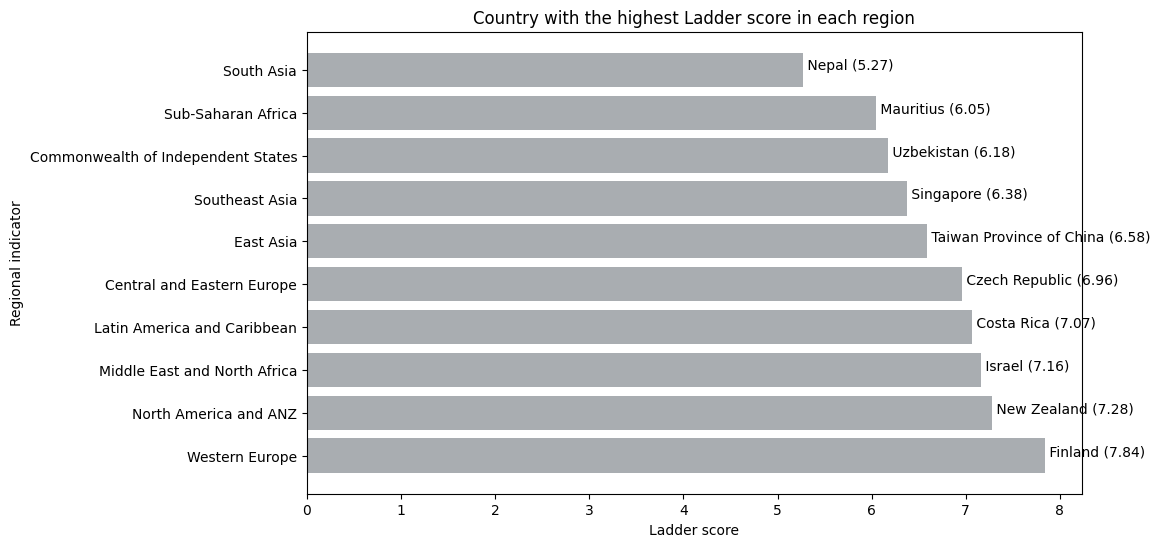

In [98]:
#Tabla ejercicio_2

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(ejercicio_2['Regional indicator'], ejercicio_2['Ladder score'], color='#A9ADB1')
plt.xlabel('Ladder score')
plt.ylabel('Regional indicator')
plt.title('Country with the highest Ladder score in each region')
for i, (score, name) in enumerate(zip(ejercicio_2['Ladder score'], ejercicio_2['Country name'])):
    plt.text(score, i, f' {name} ({score:.2f})')
plt.show()

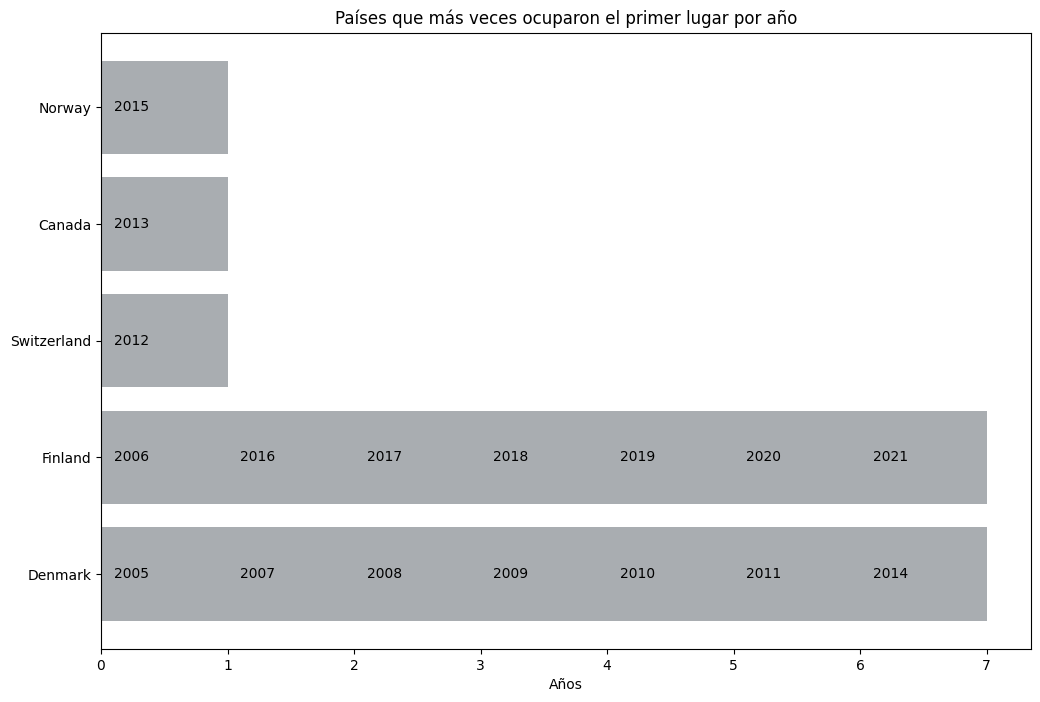

In [99]:
# Tabla ejercicio 3
import matplotlib.pyplot as plt

# Crear un DataFrame que muestre los años en los que cada país obtuvo el mayor 'Ladder score'
top_countries_with_years = top_country_per_year[['Country name', 'year']]

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))

# Obtener la lista de países únicos para iterar
unique_countries = top_countries_with_years['Country name'].unique()

# Iterar sobre cada país para crear las barras correspondientes a los años en los que ocupó el primer lugar
for i, country in enumerate(unique_countries):
    years = top_countries_with_years[top_countries_with_years['Country name'] == country]['year']
    plt.barh(i, width=len(years), color='#A9ADB1')
    for j, year in enumerate(years):
        plt.text(j + 0.1, i, year, va='center', ha='left', color='black')

# Añadir etiquetas y título
plt.xlabel('Años')
plt.yticks(range(len(unique_countries)), unique_countries)
plt.title('Países que más veces ocuparon el primer lugar por año')
plt.show()


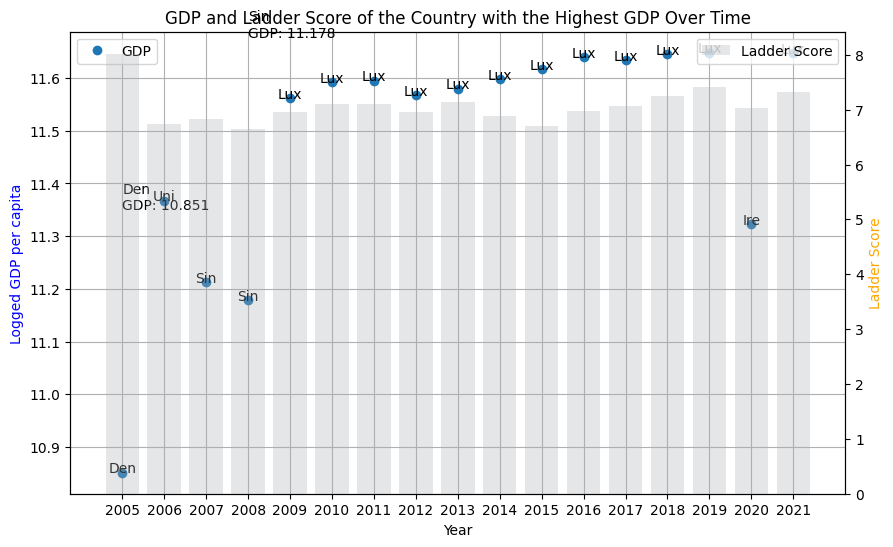

In [100]:
# Tabla ejercicio 4
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

years = combined_data['year'].unique()

ranking_df = pd.DataFrame()

for year in years:
    data_year = combined_data[combined_data['year'] == year]
    ranking_year = data_year.sort_values('Logged GDP per capita', ascending=False).reset_index()
    ranking_year['Rank'] = ranking_year.index + 1
    ranking_df = pd.concat([ranking_df, ranking_year])

first_place_countries = ranking_df[ranking_df['Rank'] == 1]

ax1.plot(first_place_countries['year'], first_place_countries['Logged GDP per capita'], 'o', label='GDP')

ax2 = ax1.twinx()
ax2.bar(first_place_countries['year'], first_place_countries['Ladder score'], alpha=0.3, label='Ladder Score', color='#A9ADB1')

for i, row in first_place_countries.iterrows():
    ax1.annotate(f"{row['Country name'][:3]}\nGDP: {row['Logged GDP per capita']}", (row['year'], row['Logged GDP per capita']+0.5))
    ax1.annotate(row['Country name'][:3], (row['year'], row['Logged GDP per capita']), ha='center')

ax1.set_xticks(years)
ax1.grid(True)
ax1.set_xlabel('Year')
ax1.set_ylabel('Logged GDP per capita', color='blue')
ax2.set_ylabel('Ladder Score', color='orange')
plt.title('GDP and Ladder Score of the Country with the Highest GDP Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

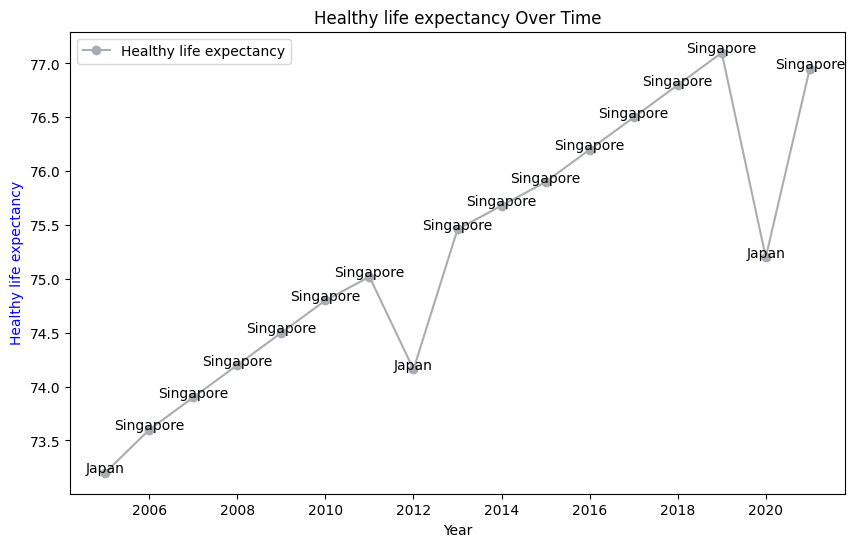

In [101]:
#Tabla ejercicio 6
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Healthy life expectancy' over 'year' with a specified color
ax.plot(result_df['year'], result_df['Healthy life expectancy'], 'o-', color='#A9ADB1', label='Healthy life expectancy')

for i, row in result_df.iterrows():
    ax.annotate(row['Country name'], (row['year'], row['Healthy life expectancy']), ha='center')

ax.set_xlabel('Year')
ax.set_ylabel('Healthy life expectancy', color='blue')
plt.title('Healthy life expectancy Over Time')
ax.legend(loc='upper left')
plt.show()